In [1]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

Reading Data

In [2]:
#reading data points 1
pts = np.zeros((1,2))
i=0
with open(r'./SpectData.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data=pts.astype(float)

<AxesSubplot:>

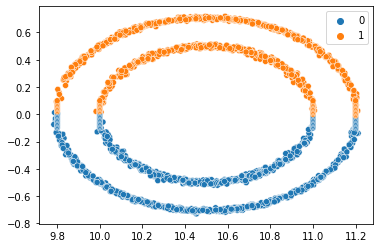

In [3]:
k=KMeans(n_clusters=2).fit(data)
k=k.predict(data)

sns.scatterplot(x=data[:,0], y=data[:,1],hue=k)


Labels

[10.49971742 -0.01608767]


<AxesSubplot:>

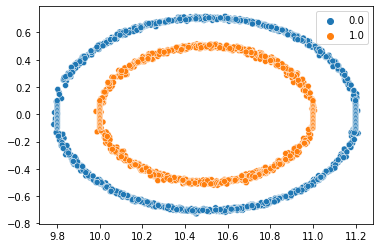

In [4]:
def euclid_distance(p1,p2):
    return math.sqrt(((p2[0]-p1[0])**2)+((p2[1]-p1[1])**2))

avg_x=np.average(data[:,0:1])
avg_y=np.average(data[:,1:2])

avg=np.array([avg_x,avg_y])
print(avg)
distances=np.zeros(2084)
for i in range(2084):
    distances[i]=euclid_distance(data[i],avg)

labels=np.zeros(2084)
for i in range(2084):
    if(distances[i]>0.6):
        labels[i]=0
    else:
        labels[i]=1

sns.scatterplot(x=data[:,0], y=data[:,1],hue=labels)        

In [5]:
def weightFunc(pts,sigma):
    res=np.zeros((len(pts),len(pts)))
    for i in range(len(pts)):
        for j in range(len(pts)):
            if(i != j):
                calc=math.exp((-1*(math.sqrt(((pts[i][0]-pts[j][0])**2)+((pts[i][1]-pts[j][1])**2)))**2)/(2*(sigma**2)))
                res[i][j] = calc         
    return(res)


In [6]:
sigma = np.arange(0.01, 1.01, 0.01).tolist()
W = []
for i in range(len(sigma)):
    W.append(weightFunc(data,sigma[i]))

In [7]:
def getD(W):
    D = np.zeros((len(W),len(W)))
    for i in range(len(W)):
        count = 0
        for j in range(len(W)):
            count += W[i][j]
        D[i][i] = count 
    return D

In [8]:
D = []
for i in range(len(sigma)):
    D.append(getD(W[i]))

In [9]:
W_numpy = np.array(W)
D_numpy = np.array(D)
subtracted_array = np.subtract(D_numpy, W_numpy)
L = list(subtracted_array)

In [10]:
def eigen_vectors(L): #L: Laplacian
    arr_of_eig_vectors=[]
    for i in range(100):
        eig_values,eig_vectors=np.linalg.eigh(L[i])
        arr_of_eig_vectors.append(eig_vectors[:,1:2])#eigh sorts eigenvalues 

    return arr_of_eig_vectors

arr_of_eig_vectors=eigen_vectors(L)

#proof that eigen values are always sorted when eigh is used
# y=np.zeros(100)
# for i in range(100):
#     eig_values,eig_vectors=np.linalg.eigh(L[i])
#     eig_values_sorted=eig_values
#     eig_values_sorted=np.sort(eig_values_sorted)
#     if((eig_values_sorted==eig_values).all()==True):
#         y[i]=1
# print(y.all()==1)



In [11]:
def calcPredictions(eig_vectors):
    predictions=np.zeros((100,2084))
    for i in range(100):
        for j in range(2084):
            if(eig_vectors[i][j]>0):
                predictions[i][j]=1
            else:
                predictions[i][j]=0
    return predictions

predictions=calcPredictions(arr_of_eig_vectors)


Maximim Accuracy = 100.0
using sigma = 0.0


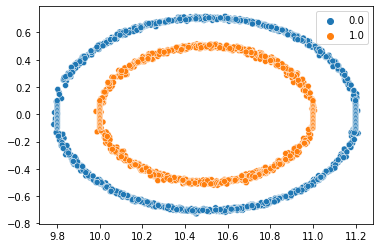

In [27]:
def calcAccuracies(predictions):
    accuracies=np.zeros(100)
    for i in range(100):
        count=0
        for j in range(2084):
            if(predictions[i][j]==labels[j]):
                count+=1
        accuracies[i]=count/2084*100

    return accuracies

accuracies=calcAccuracies(predictions)
    
max_accuracy=np.max(accuracies)    
sigma_of_max_accuracy=np.where(accuracies==np.max(accuracies))[0][0]*10**-2

print("Maximim Accuracy = "+str(max_accuracy))
print("using sigma = "+str(sigma_of_max_accuracy))

sns.scatterplot(x=data[:,0], y=data[:,1],hue=predictions[int(sigma_of_max_accuracy*100)]) #plot of the best accuracy
plt.savefig("Kmeansa.jpg")

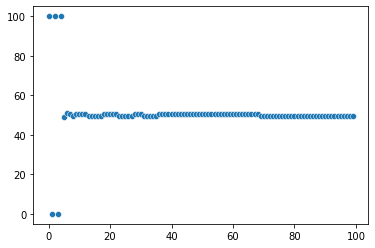

In [28]:
sns.scatterplot(data=accuracies) #plot of the clustering accuracy versus different values of the standard deviation
plt.savefig("Spect_a.jpg")

Another Approach

In [14]:
def predict(L):
    predictions=np.zeros((100,2084))

    for i in range(len(sigma)):
        eig_values,eig_vectors=np.linalg.eigh(L[i])
        U=eig_vectors[:,1:2]
        kmean=KMeans(n_clusters=2).fit(U.reshape(-1,1))
        predictions[i]=kmean.predict(U.reshape(-1,1))

    return predictions
    
another_predictions=predict(L) 

In [15]:
another_accuracies=calcAccuracies(another_predictions)
    
max_accuracy=np.max(another_accuracies)    
sigma_of_max_accuracy=np.where(accuracies==np.max(accuracies))[0][0]*10**-2

print("Maximim Accuracy = "+str(max_accuracy))
print("using sigma = "+str(sigma_of_max_accuracy))
print(another_accuracies)


Maximim Accuracy = 100.0
using sigma = 0.0
[  0.         100.         100.         100.         100.
  51.15163148  48.99232246  49.0403071   49.32821497  49.37619962
  50.57581574  50.57581574  50.47984645  49.52015355  49.52015355
  50.47984645  49.52015355  49.52015355  49.5681382   49.5681382
  50.38387716  49.61612284  49.61612284  49.61612284  49.61612284
  50.38387716  49.61612284  50.38387716  49.61612284  49.61612284
  49.61612284  50.38387716  50.4318618   50.4318618   50.38387716
  50.38387716  50.38387716  49.61612284  50.38387716  49.61612284
  49.66410749  50.33589251  50.33589251  50.33589251  50.33589251
  49.61612284  49.61612284  49.61612284  50.4318618   50.4318618
  50.38387716  50.38387716  50.4318618   49.5681382   50.4318618
  49.5681382   49.5681382   49.61612284  50.38387716  49.61612284
  49.61612284  49.61612284  50.38387716  50.38387716  50.38387716
  49.61612284  49.61612284  50.33589251  49.66410749  49.66410749
  49.66410749  49.66410749  50.33589251  50.

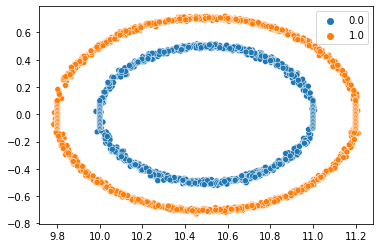

In [29]:
sns.scatterplot(x=data[:,0], y=data[:,1],hue=another_predictions[int(sigma_of_max_accuracy*100)])
plt.savefig("Kmeans_a_another_approach.jpg")


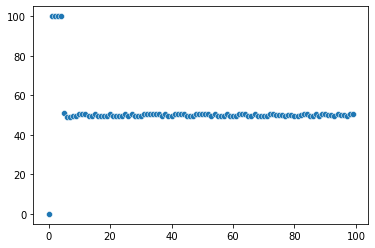

In [30]:
sns.scatterplot(data=another_accuracies) #plot of the clustering accuracy versus different values of the standard deviation
plt.savefig("Spect_a_another_approach.jpg")

In [18]:
#reading data points 2
pts = np.zeros((1,2))
i=0
with open(r'./SpectData2.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data2=pts.astype(float)


In [20]:
W = []
for i in range(len(sigma)):
    W.append(weightFunc(data2,sigma[i]))

In [21]:
D = []
for i in range(len(sigma)):
    D.append(getD(W[i]))

In [22]:
W_numpy = np.array(W)
D_numpy = np.array(D)
subtracted_array = np.subtract(D_numpy, W_numpy)
L = list(subtracted_array)


In [23]:
arr_of_eig_vectors2=eigen_vectors(L)

In [24]:
predictions2 = calcPredictions(arr_of_eig_vectors2)

Maximim Accuracy = 55.13435700575816
using sigma = 0.03


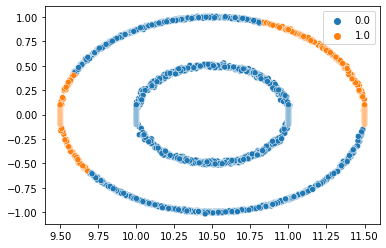

In [31]:
accuracies2=calcAccuracies(predictions2)
    
max_accuracy2=np.max(accuracies2)    
sigma_of_max_accuracy2=np.where(accuracies2==np.max(accuracies2))[0][0]*10**-2

print("Maximim Accuracy = "+str(max_accuracy2))
print("using sigma = "+str(sigma_of_max_accuracy2))

sns.scatterplot(x=data2[:,0], y=data2[:,1],hue=predictions2[int(sigma_of_max_accuracy2*100)]) #plot of the best accuracy
plt.savefig("Kmeansb.jpg")

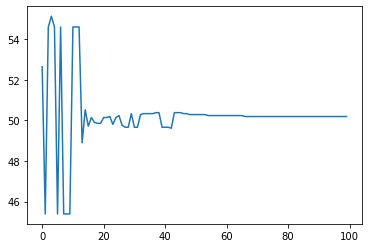

In [32]:
sns.lineplot(data=accuracies2) #plot of the clustering accuracy versus different values of the standard deviation
plt.savefig("Spect_b.jpg")